作業一：房價預測

<br> 提升結果方法-->更換不同模型

In [122]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
# 建立用於繪圖比較模型的array
r2 = []

In [124]:
df = pd.read_csv("./data/Housing_Dataset_Sample.csv")
df.head(n=6)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
5,80175.754159,4.988408,6.104512,4.04,26748.428425,1.068138e+06,"06039 Jennifer Islands Apt. 443\nTracyport, KS..."


In [125]:
X = df.iloc[:,:5]
y = df['Price']

In [126]:
X

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472
...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035
4996,78491.275435,6.999135,6.576763,4.02,25616.115489
4997,63390.686886,7.250591,4.805081,2.13,33266.145490
4998,68001.331235,5.534388,7.130144,5.44,42625.620156


In [127]:
y

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64

In [128]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

In [129]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)
predictions =  reg.predict(X_test)

from sklearn.metrics import r2_score
print(r2_score(y_test, predictions))
r2.append(r2_score(y_test, predictions))

0.9211543991762884


隨機森林

In [130]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(random_state=99)
rf_reg.fit(X_train, y_train)
rf_predictions = rf_reg.predict(X_test)

print(r2_score(y_test, rf_predictions))
r2.append(r2_score(y_test, rf_predictions))

0.8864049422943892


梯度提升回歸模型
<br>一種集成學習方法，透過組合多個弱模型（ex.決策樹）來構建一個強大的模型
<br>參考資料：https://medium.com/@cwchang/gradient-boosting-%E7%B0%A1%E4%BB%8B-f3a578ae7205

In [131]:
from sklearn.ensemble import GradientBoostingRegressor

gb_reg = GradientBoostingRegressor(random_state=99)
gb_reg.fit(X_train, y_train)
gb_predictions = gb_reg.predict(X_test)
print(r2_score(y_test, gb_predictions))
r2.append(r2_score(y_test, gb_predictions))

0.9053529929648303


嶺回歸（Ridge Regression）
<br>一種線性回歸的改進方法
<br>在普通線性回歸的基礎上引入了正則化項。
<br>正則化項是模型係數的平方和的乘數，
<br>透過這個項來對模型的複雜性進行控制，有助於防止過擬合。
<br>
參考資料：https://roger010620.medium.com/linear-regression-lasso-ridge%E4%BB%8B%E7%B4%B9-%E9%99%84python-code-76e89af4dce9

In [132]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1.0)

ridge_reg.fit(X_train, y_train)

predictions_ridge = ridge_reg.predict(X_test)

print(r2_score(y_test, predictions_ridge))
r2.append(r2_score(y_test, predictions_ridge))


0.9211581331166268


Lasso回歸（Lasso Regression）
<br>一種線性回歸的改進方法，類似於岭回歸，但引入了L1正則化項。
<br>正則化項是模型係數的絕對值之和的乘數，
<br>透過這一項來對模型的複雜性進行控制，並具有稀疏化效果，
<br>可以促使一些係數變為零，從而實現特徵選擇的效果。

In [133]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=1.0)  # 控制正則化的強度

lasso_reg.fit(X_train, y_train)
predictions_lasso = lasso_reg.predict(X_test)

print(r2_score(y_test, predictions_lasso))
r2.append(r2_score(y_test, predictions_lasso))


0.9211545467100717


繪製散點圖

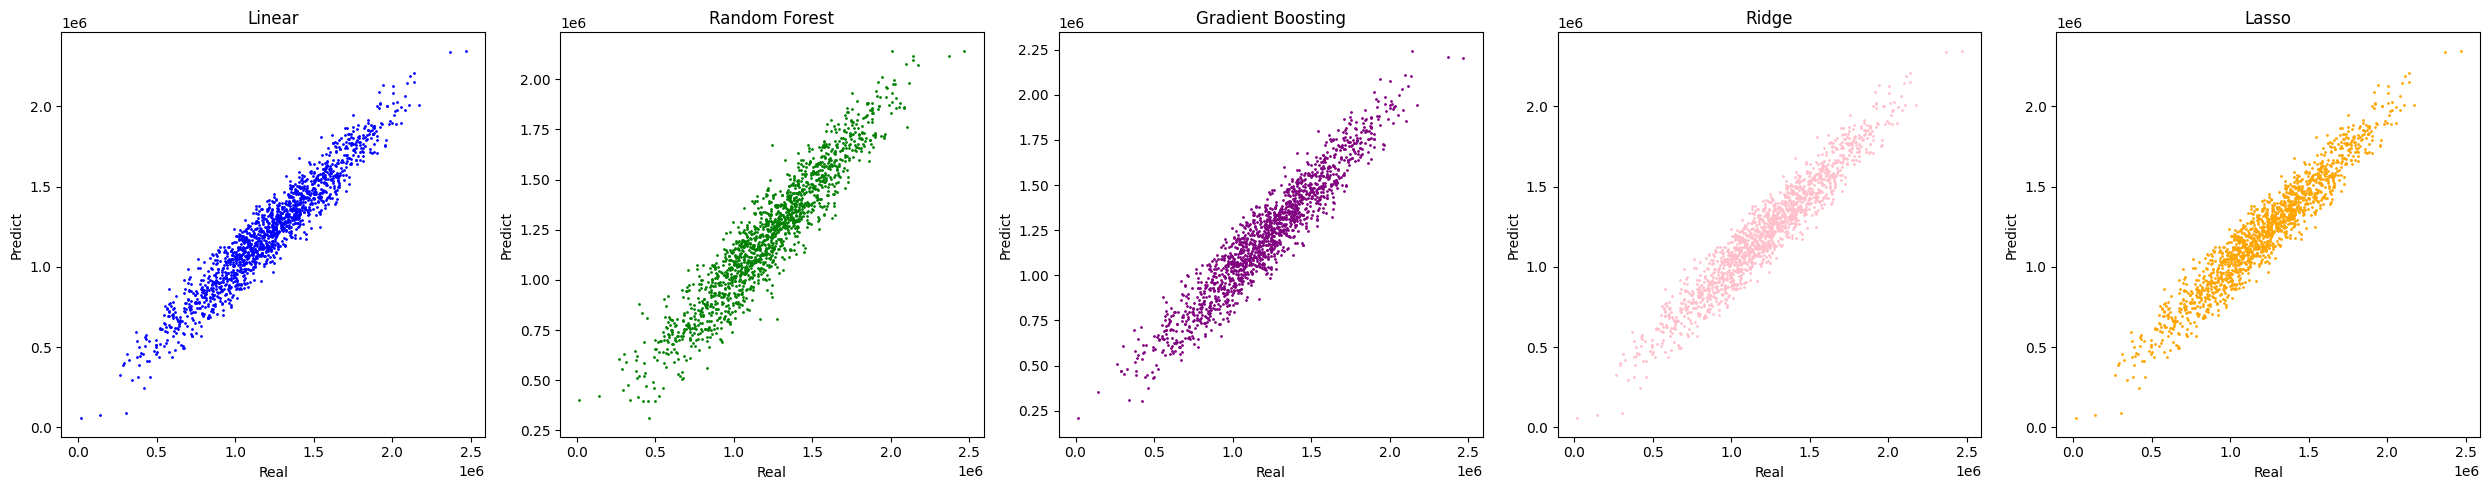

In [134]:
fig, axes = plt.subplots(1, 5, figsize=(25, 5))

model_name = ['Linear', 'Random Forest', 'Gradient Boosting',
              'Ridge', 'Lasso']

axes[0].scatter(y_test, predictions, s=1, color='blue')
axes[0].set_title(model_name[0])
axes[0].set_xlabel('Real')
axes[0].set_ylabel('Predict')

axes[1].scatter(y_test, rf_predictions, s=1, color='green')
axes[1].set_title(model_name[1])
axes[1].set_xlabel('Real')
axes[1].set_ylabel('Predict')

axes[2].scatter(y_test, gb_predictions, s=1, color='purple')
axes[2].set_title(model_name[2])
axes[2].set_xlabel('Real')
axes[2].set_ylabel('Predict')

axes[3].scatter(y_test, predictions_ridge, s=1, color='pink')
axes[3].set_title(model_name[3])
axes[3].set_xlabel('Real')
axes[3].set_ylabel('Predict')

axes[4].scatter(y_test, predictions_lasso, s=1, color='orange')
axes[4].set_title(model_name[4])
axes[4].set_xlabel('Real')
axes[4].set_ylabel('Predict')

plt.tight_layout()

plt.show()

繪製比較圖

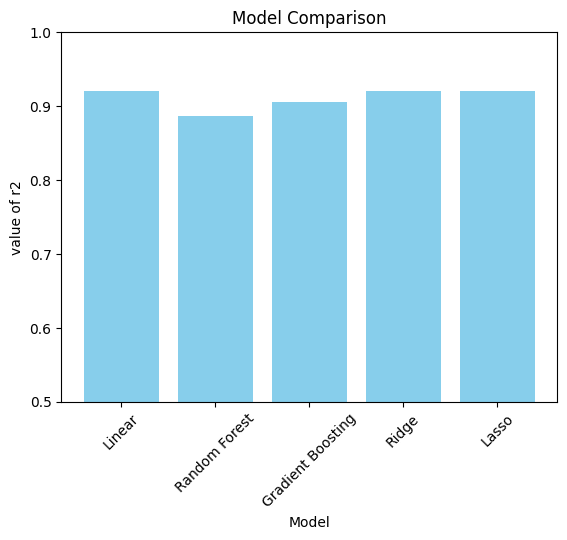

In [135]:
plt.bar(model_name, r2, color='skyblue')
plt.ylim(0.5, 1.0)
plt.title('Model Comparison')
plt.xlabel('Model')
plt.xticks(model_name, rotation=45)
plt.ylabel('value of r2')

plt.show()

In [136]:
r2_dict = dict(zip(model_name, r2))
sorted_r2_dict = dict(sorted(r2_dict.items(), key=lambda item: item[1], reverse=True))
print("根據R^2值由大到小排列: ")
for model, r2_value in sorted_r2_dict.items():
    print(f'{model}: {r2_value}')

根據R^2值由大到小排列: 
Ridge: 0.9211581331166268
Lasso: 0.9211545467100717
Linear: 0.9211543991762884
Gradient Boosting: 0.9053529929648303
Random Forest: 0.8864049422943892
